In [1]:
import pandas as pd
import numpy as np

In [6]:
# 훈련 데이터, 테스트 데이터를 읽어온다
data_path = 'C:/ITStudy/99.publicRes/TIL/Python/3.ML-Kaggle/kaggle_porto-seguro-safe-driver-prediction/data/'
trn = pd.read_csv(data_path + 'train.csv', na_values=['-1','-1.0'])
tst = pd.read_csv(data_path + 'test.csv', na_values=['-1','-1.0'])

## 기초 통계로 데이터 살펴 보기

In [7]:
# 데이터의 크기를 확인한다
print(trn.shape, tst.shape)

(595212, 59) (892816, 58)


In [8]:
# 데이터 첫 5줄을 확인한다
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [9]:
# 데이터프레임에 대한 메타 정보를 확인한다
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [22]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 59 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892509 non-null float64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892671 non-null float64
ps_ind_05_cat     884106 non-null float64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         731132 non-null float

In [10]:
# 타겟 변수의 고유값과 타겟==1의 비율을 계산한다
print(np.unique(trn['target']))
print(1.0 * sum(trn['target'])/trn.shape[0])  # 타겟 변수에서 '1'의 비율 계산

[0 1]
0.0364475178592


In [12]:
# 그 외 기초 통계 기법

# 변수의 최대값, 최소값 등을 확인한다
trn.describe()

# 변수의 결측값을 확인한다
trn.isnull().sum(axis=0)
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


## 시각화로 데이터 살펴 보기

In [13]:
# 훈련 데이터와 테스트 데이터를 통합한다
tst['target'] = np.nan # test data에는 'target'변수가 없기 때문에 NaN으로 값을 넣어줌
df = pd.concat([trn, tst], axis=0) # 2개의 dataframe을 rbind함

In [14]:
# 시각화 관련 라이브러리를 불러온다
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
# 시각화 관련 함수를 미리 정의한다
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5)) # plt.subplots() : 같은 plt.subplots() 객체를 추가하면 밑으로 계속 추가되어 그려짐
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5) # hue 옵션 : 옵션으로 변수명을 주면 그 변수의 값별로 group by 해서 그래프를 그려줌
    plt.show()
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()
    
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=data) # seaborn의 barplot은 default로 95% CI를 같이 그려준다
    plt.show()

In [32]:
# 분석의 편의를 위해 변수 유형별로 구분한다
# 이진 변수
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

### 단일 변수 히스토그램

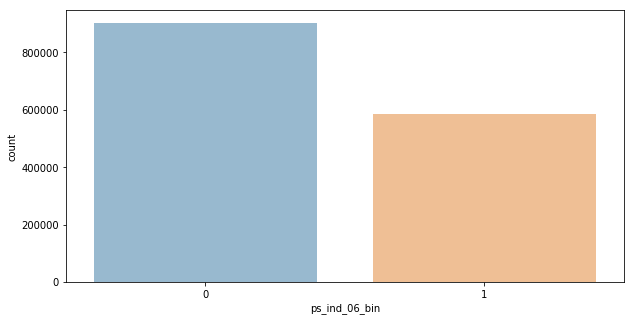

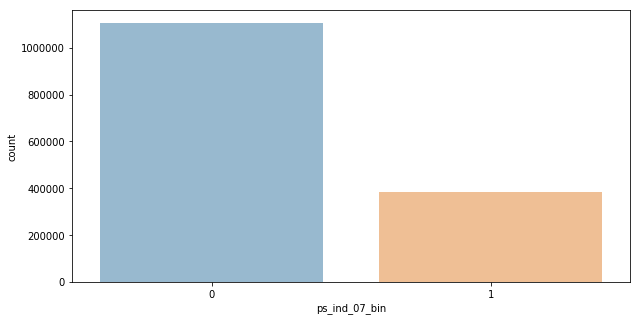

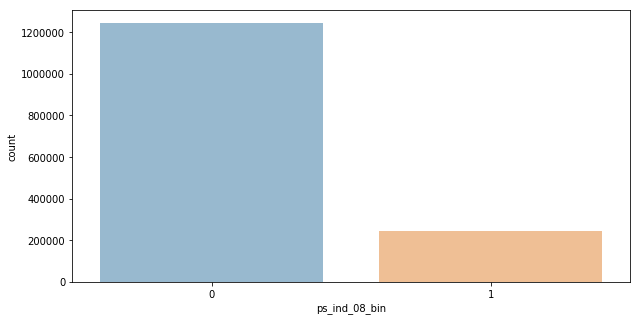

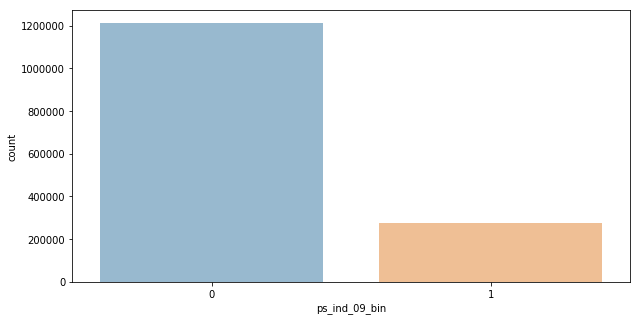

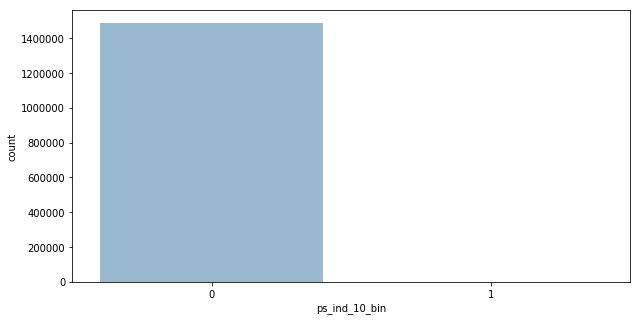

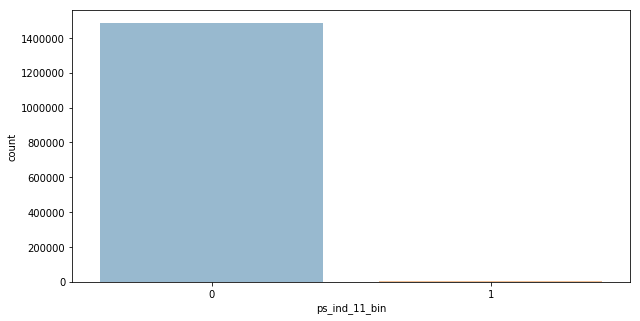

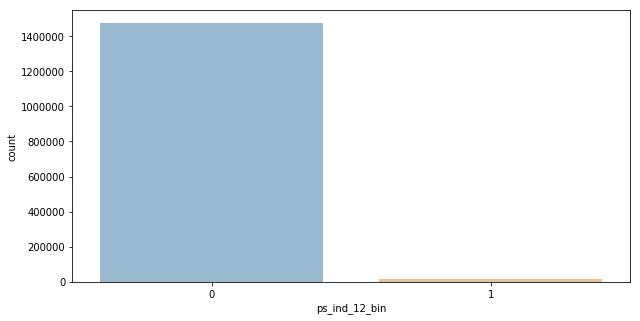

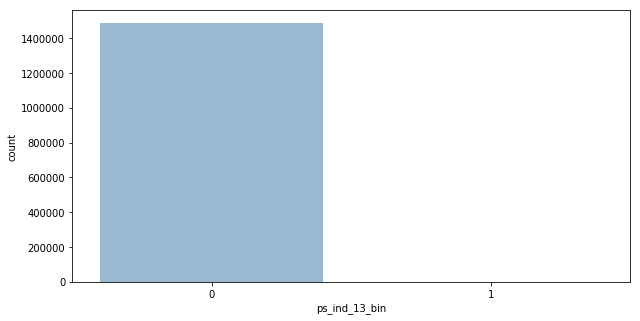

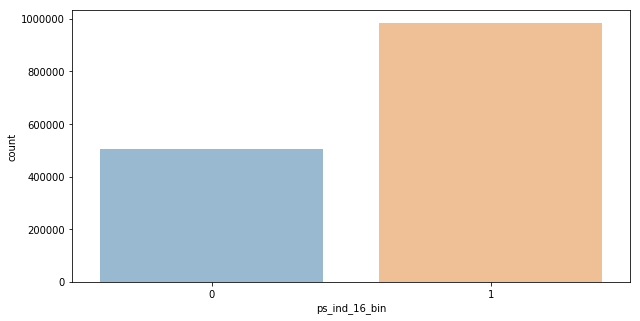

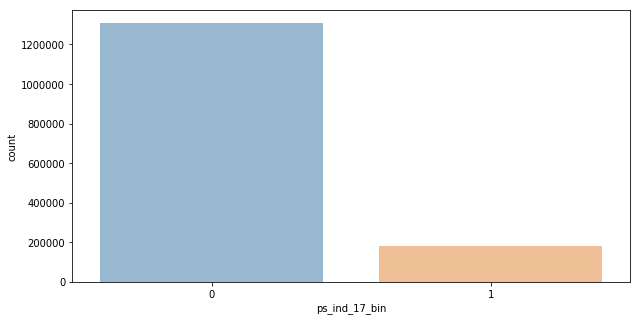

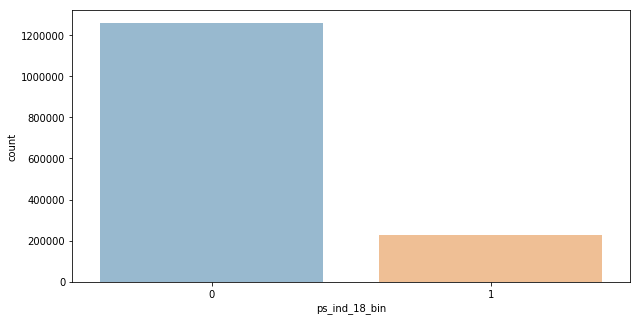

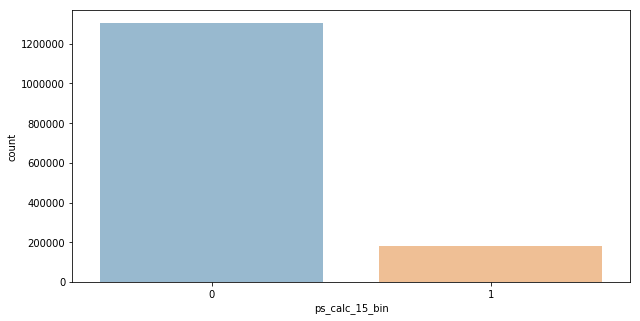

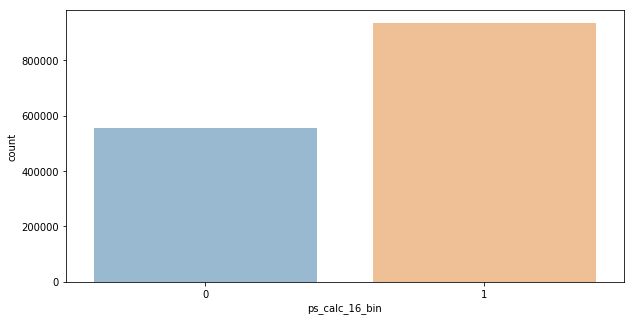

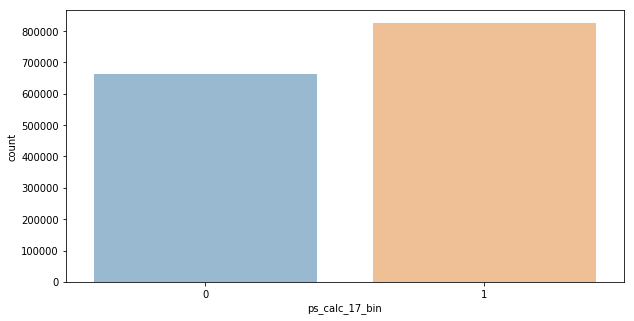

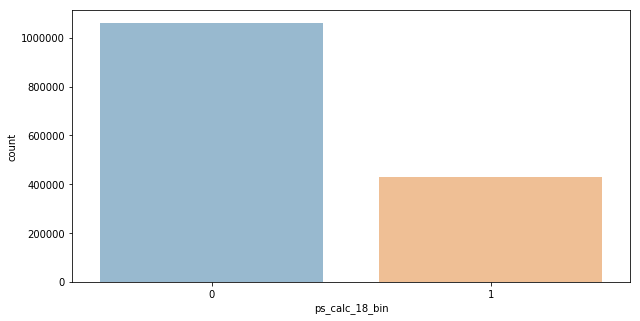

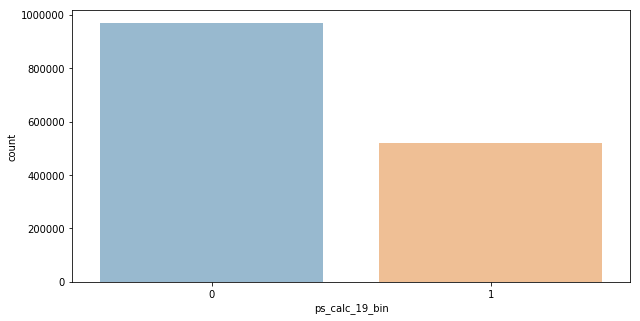

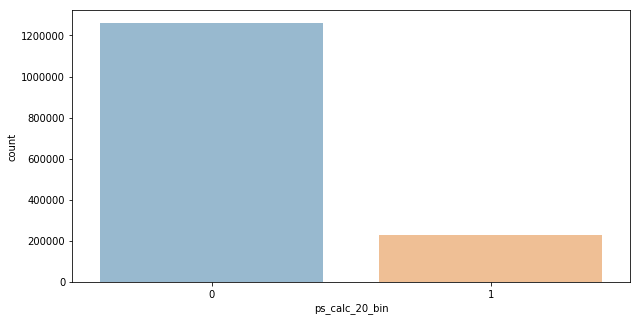

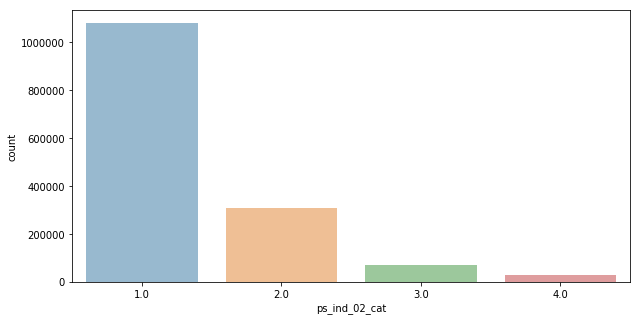

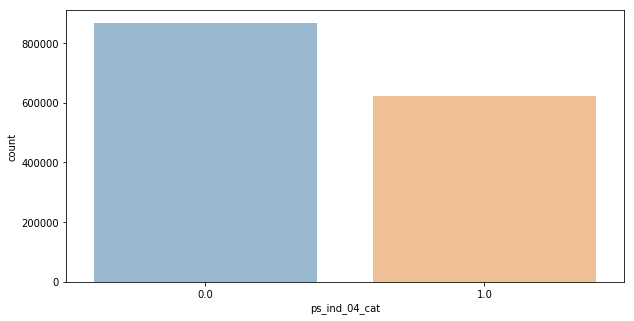

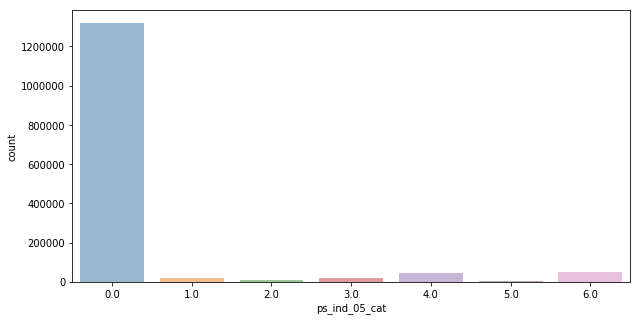

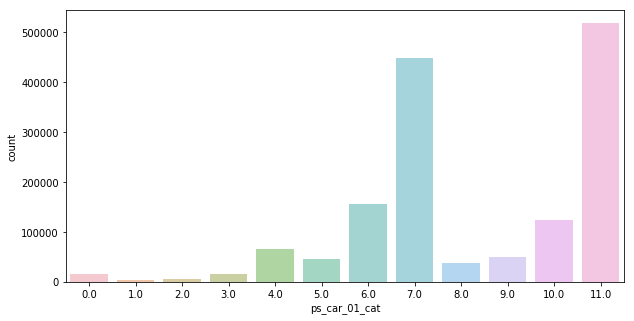

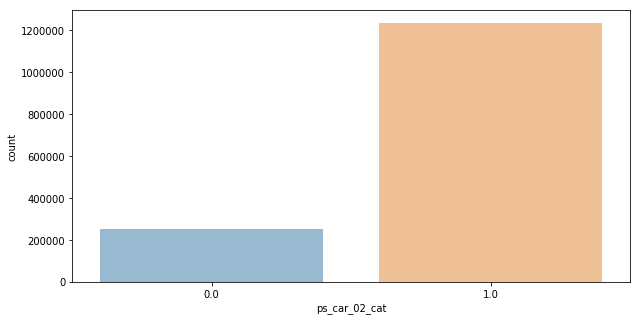

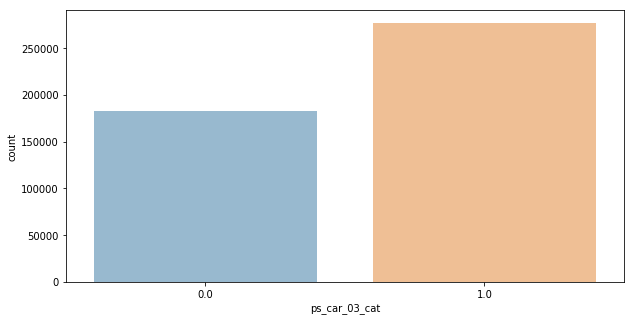

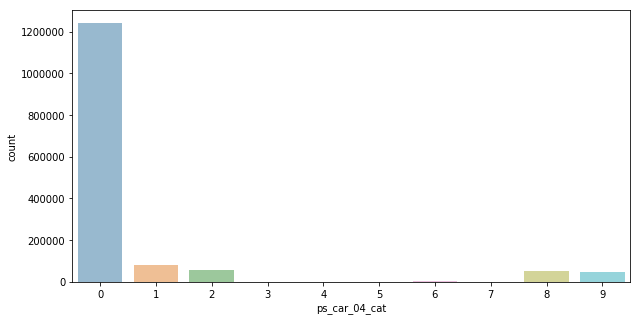

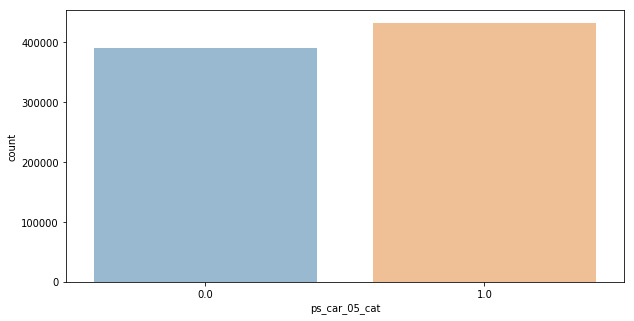

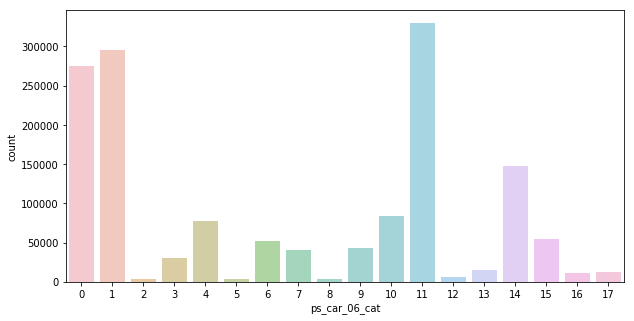

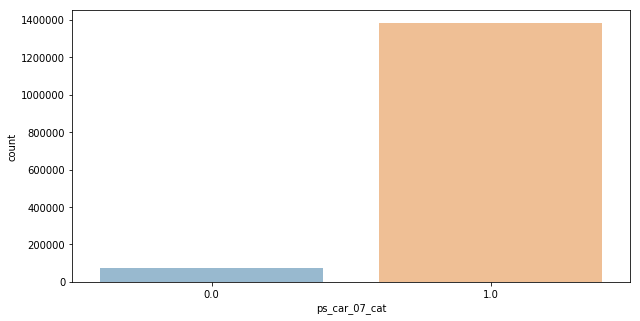

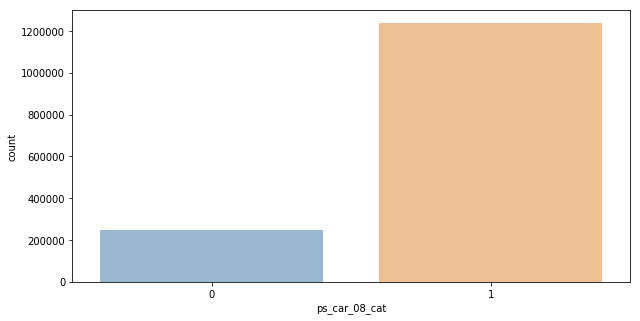

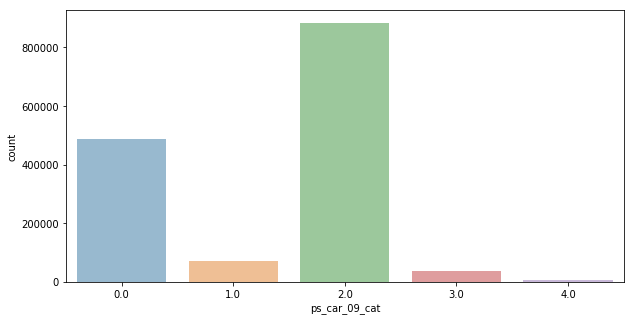

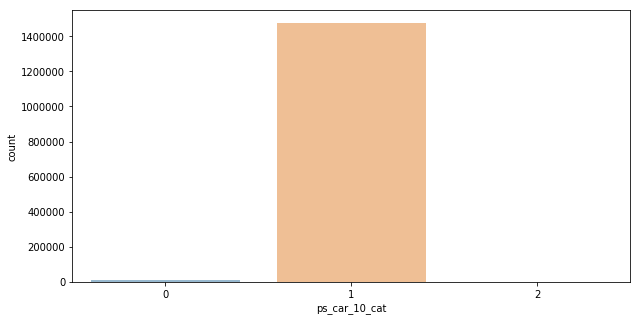

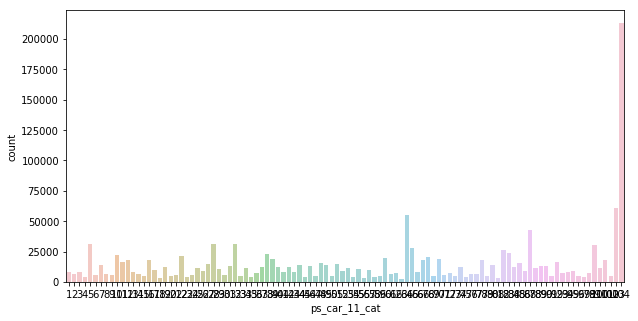

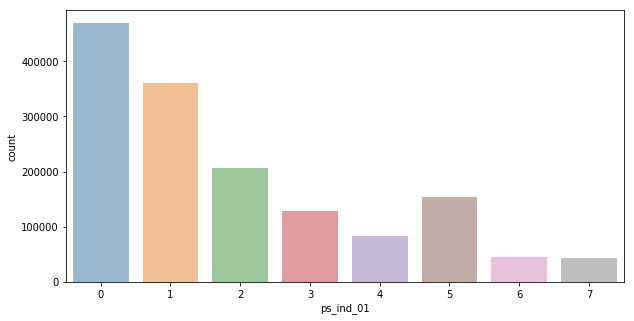

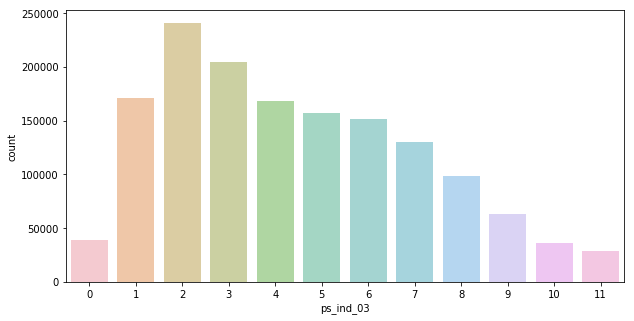

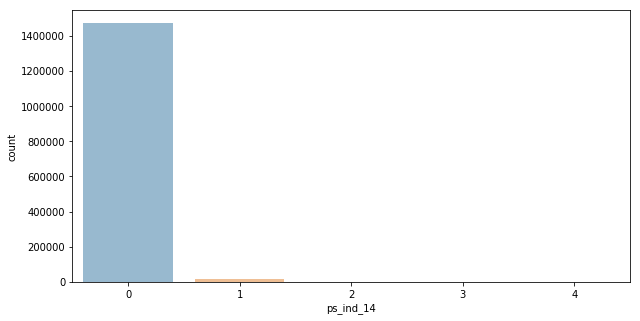

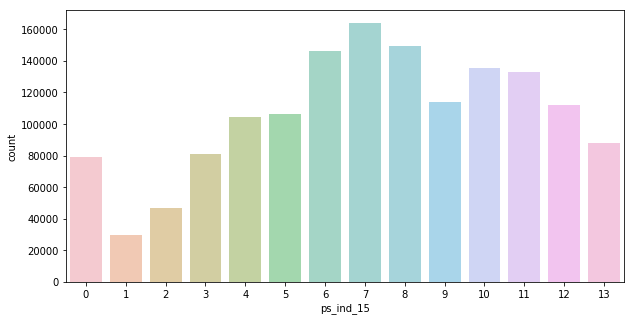

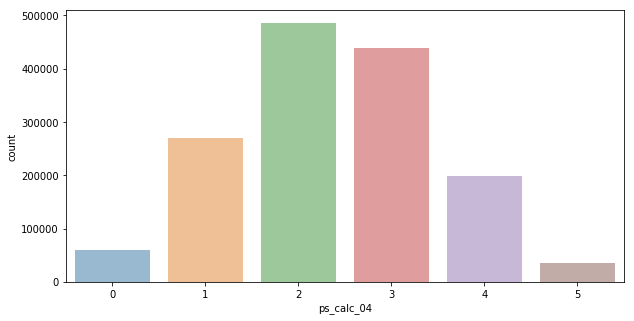

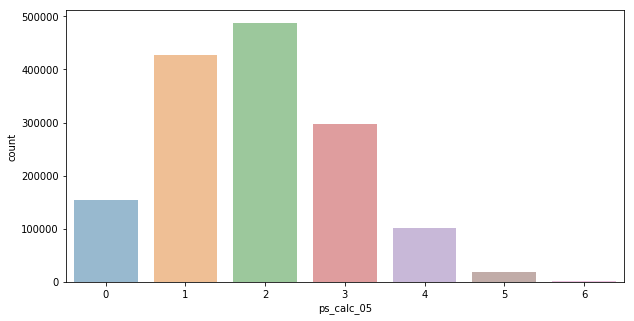

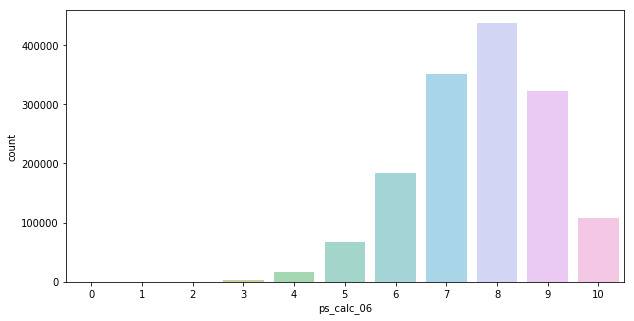

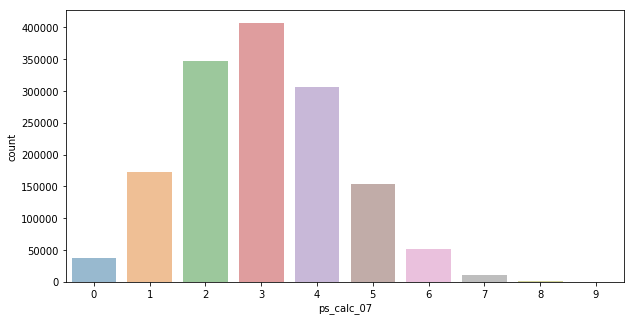

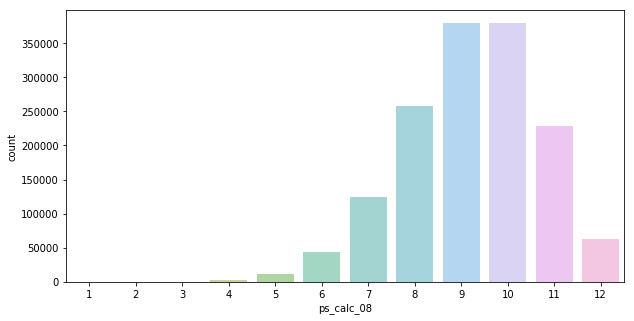

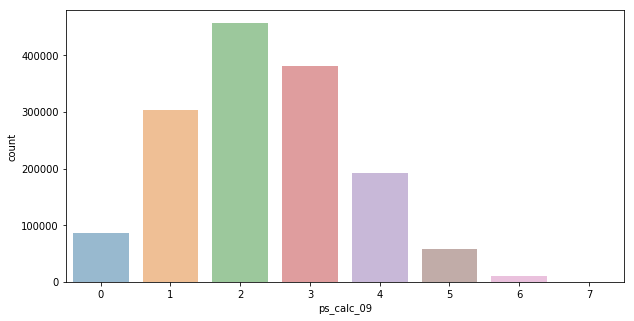

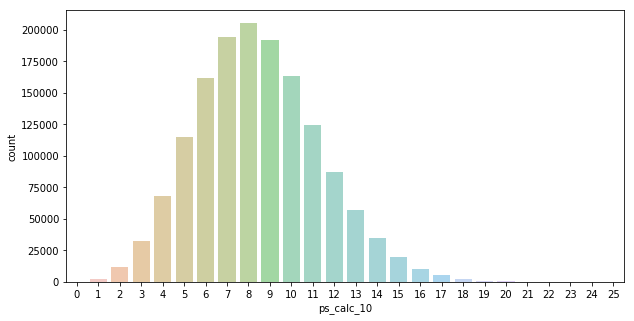

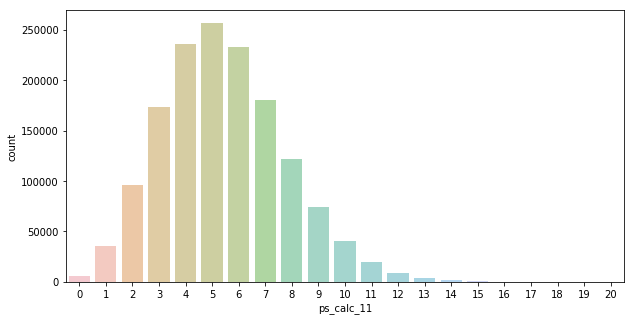

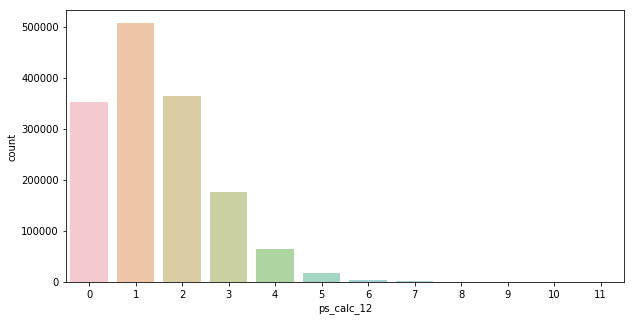

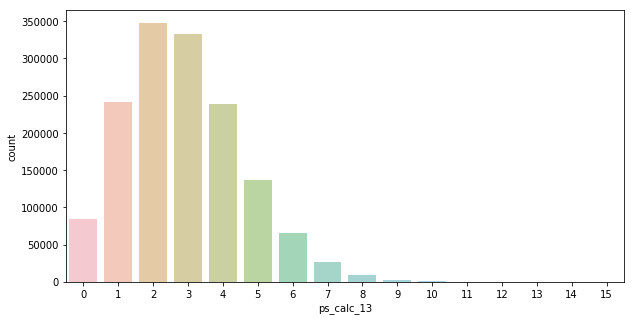

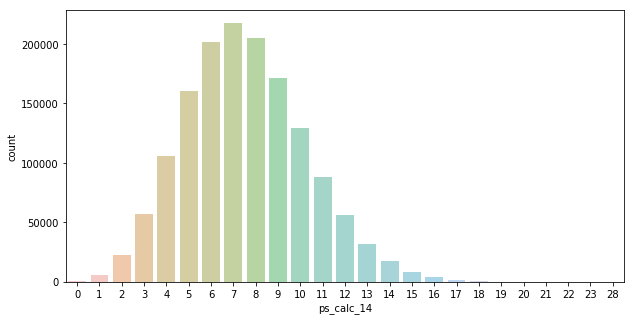

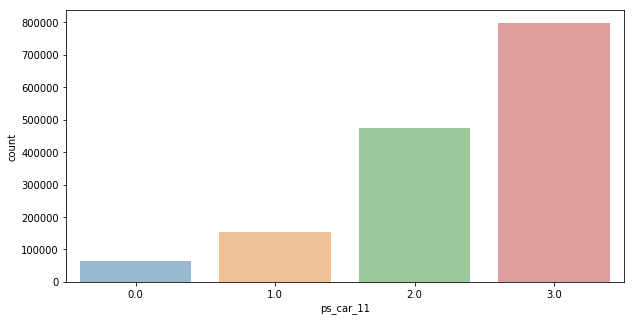

In [33]:
for col in binary + category + integer:
    bar_plot(col, df)

### 변수간 상관관계

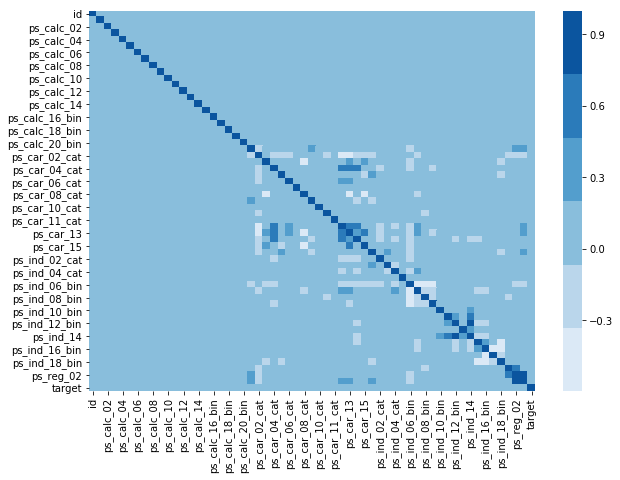

In [18]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = df.corr() # correlation matrix 구해줌
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [35]:
print(corr)

                      id  ps_calc_01  ps_calc_02    ps_calc_03  ps_calc_04  \
id              1.000000    0.000779    0.000212 -3.009710e-04    0.001556   
ps_calc_01      0.000779    1.000000   -0.001436  2.035623e-04    0.000069   
ps_calc_02      0.000212   -0.001436    1.000000  1.049686e-03   -0.000374   
ps_calc_03     -0.000301    0.000204    0.001050  1.000000e+00   -0.001004   
ps_calc_04      0.001556    0.000069   -0.000374 -1.004015e-03    1.000000   
ps_calc_05     -0.000681    0.001015   -0.000890 -9.710157e-04    0.000507   
ps_calc_06     -0.000181    0.000463    0.001267  4.431070e-04   -0.000323   
ps_calc_07      0.000739    0.000791   -0.000066  7.714227e-04    0.000696   
ps_calc_08      0.000516    0.000630    0.000348  1.064219e-04   -0.000555   
ps_calc_09      0.001072   -0.000151   -0.000201 -6.634653e-04    0.000232   
ps_calc_10     -0.000241    0.000640   -0.000423  5.671961e-04   -0.000451   
ps_calc_11      0.000362   -0.001499   -0.000702 -5.358561e-04  

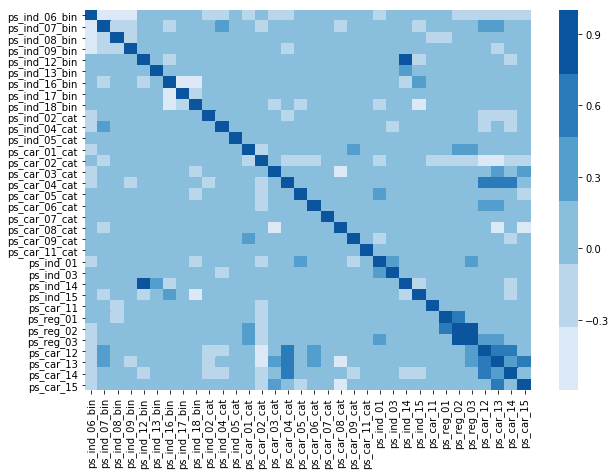

In [14]:
# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

### 단일 변수 vs 타겟 변수

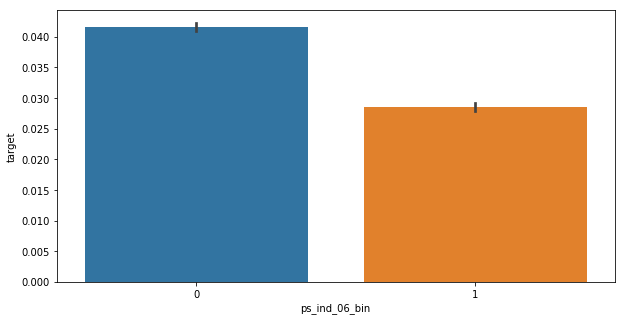

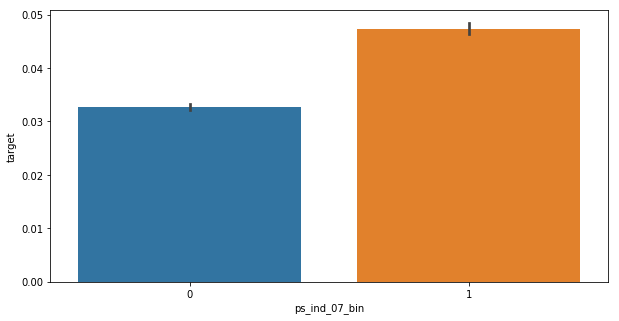

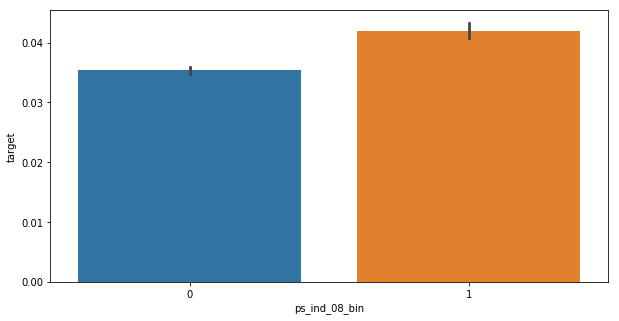

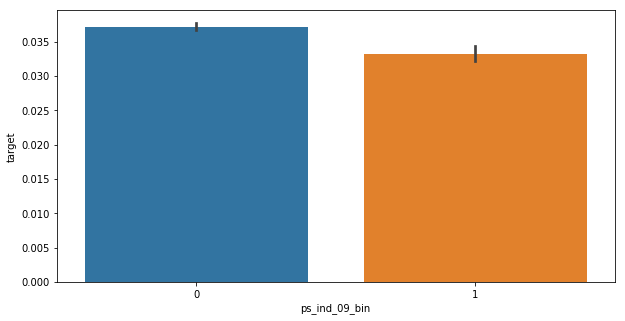

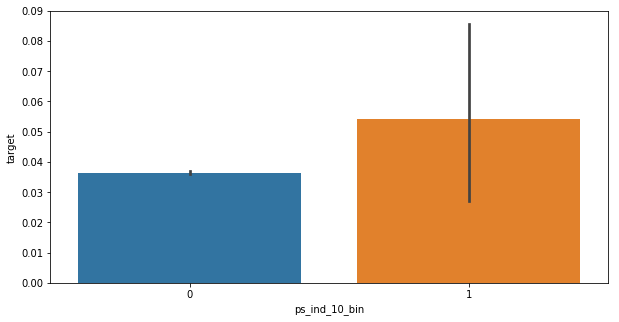

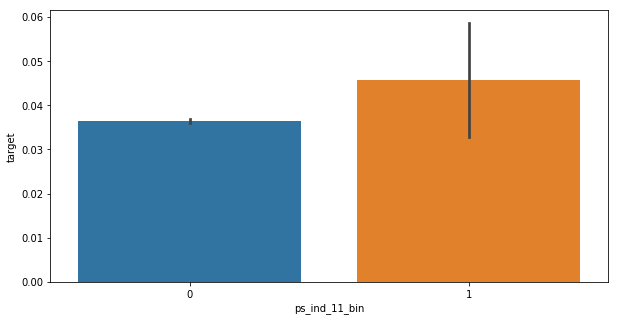

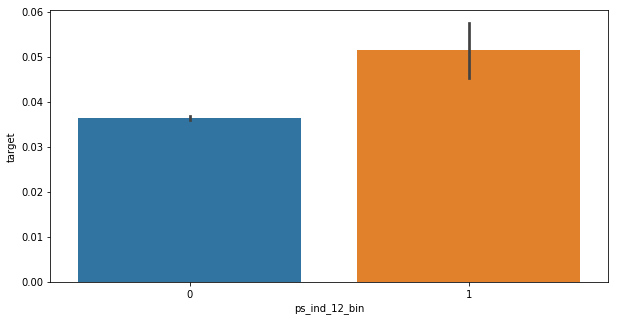

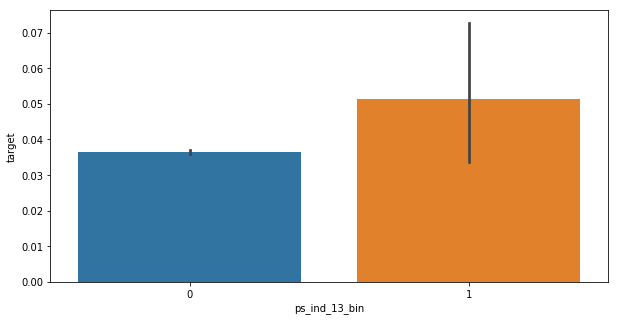

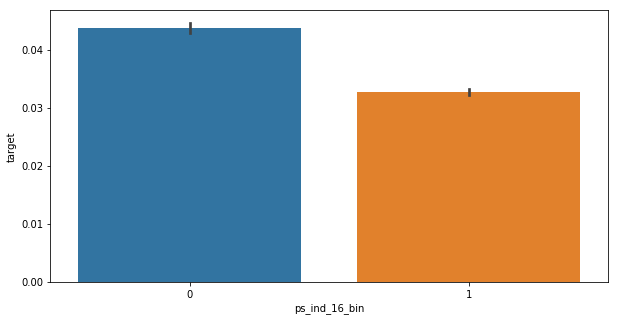

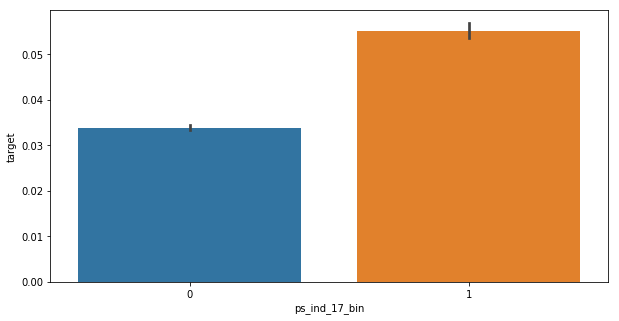

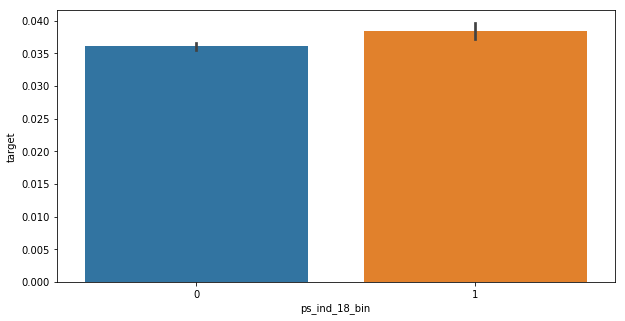

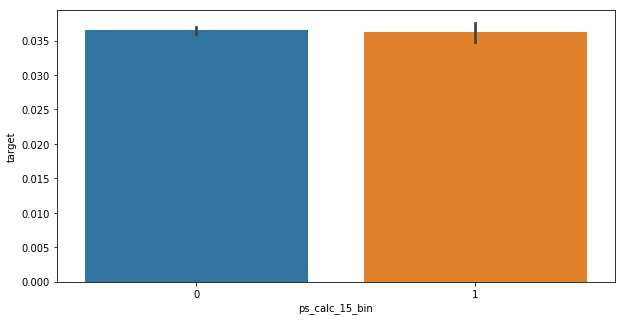

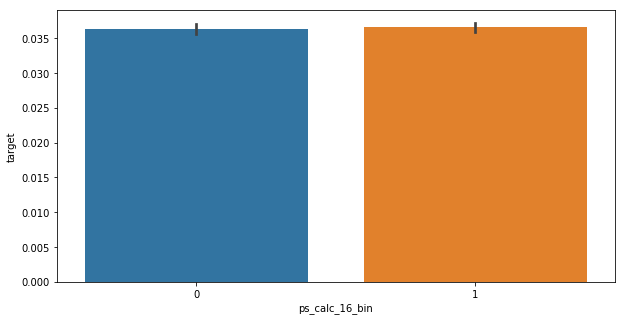

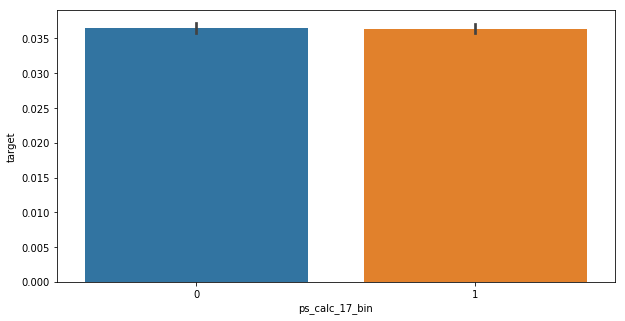

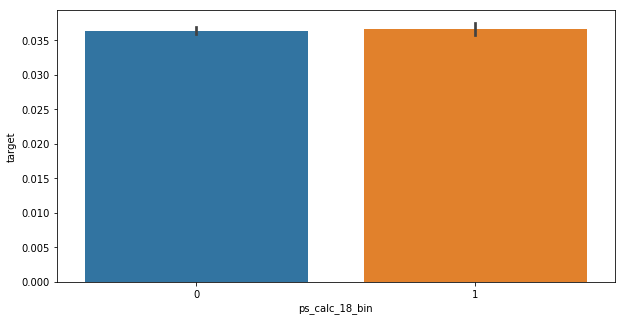

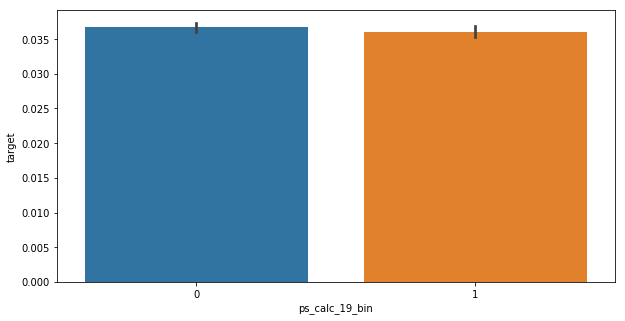

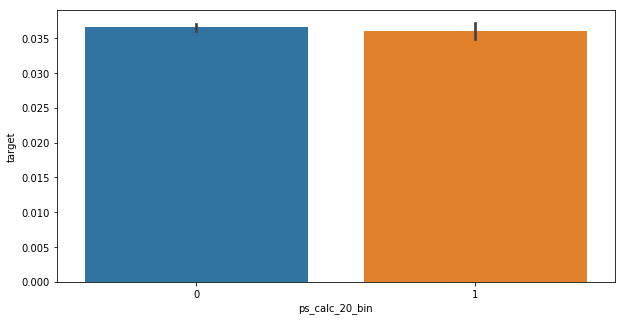

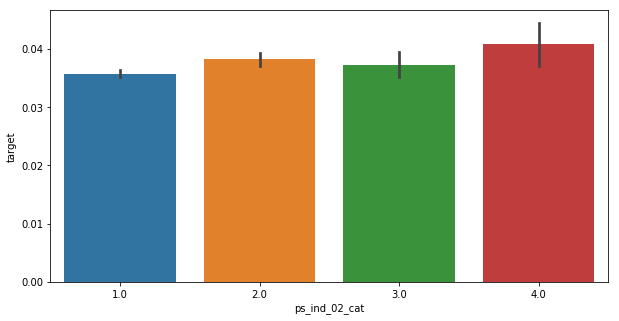

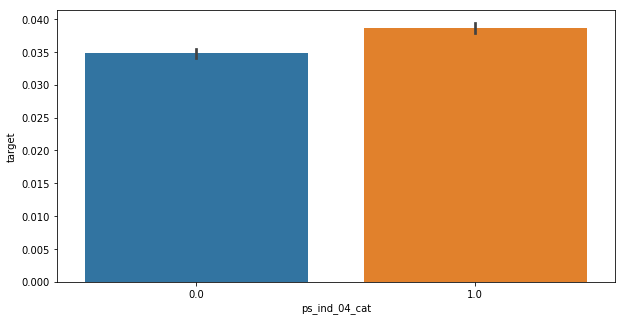

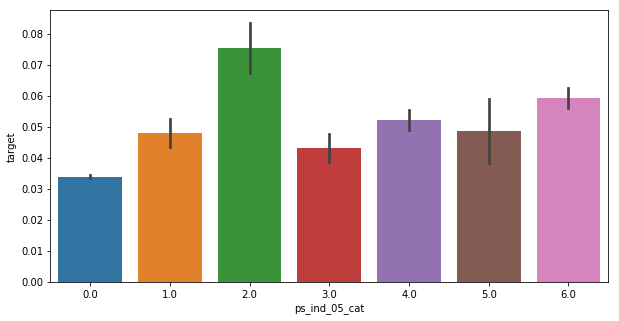

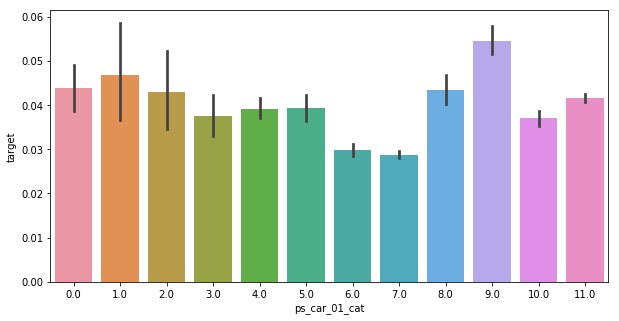

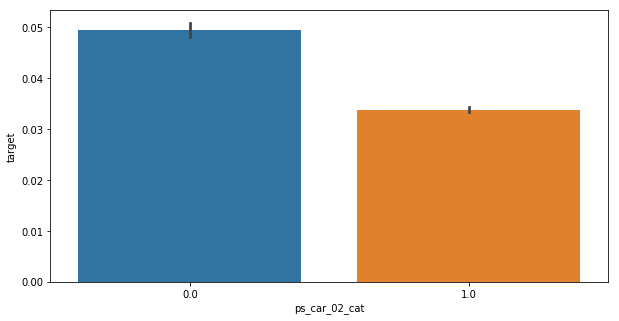

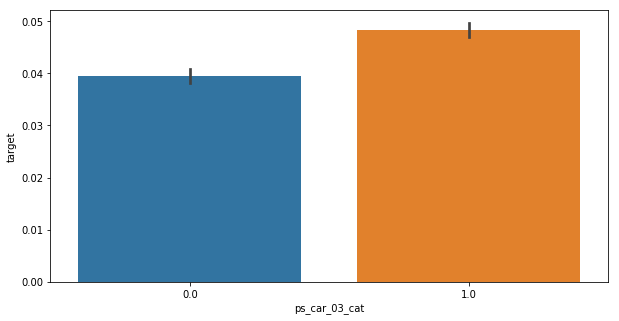

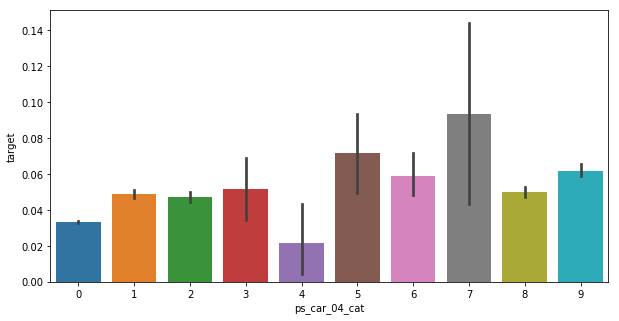

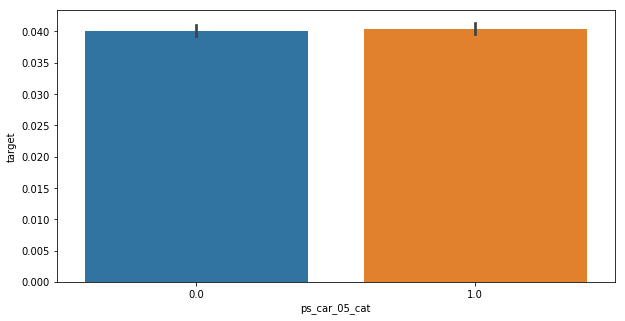

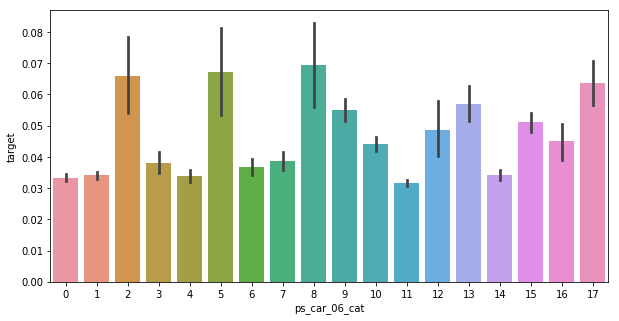

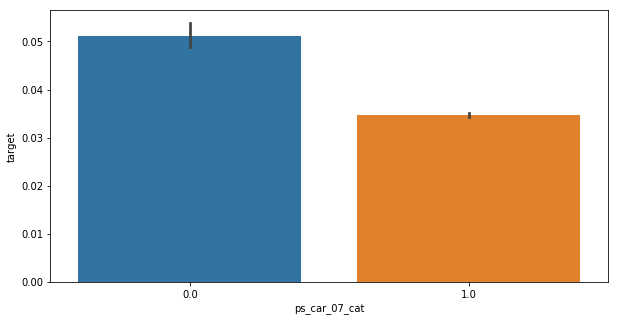

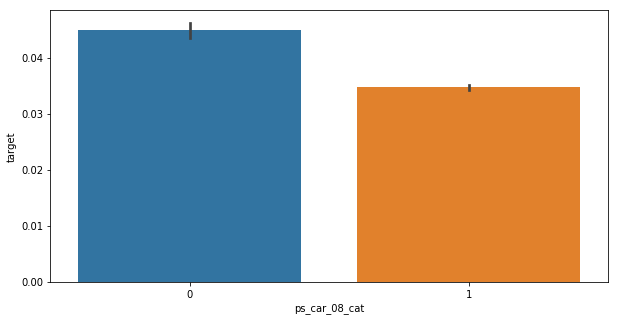

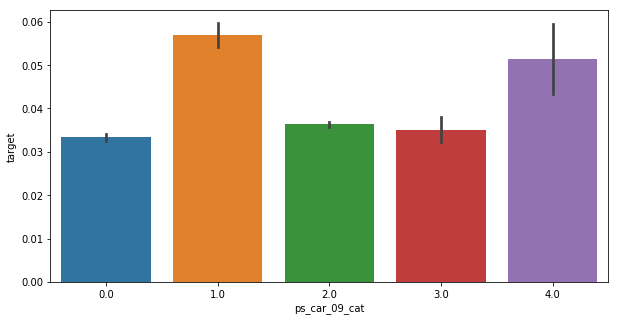

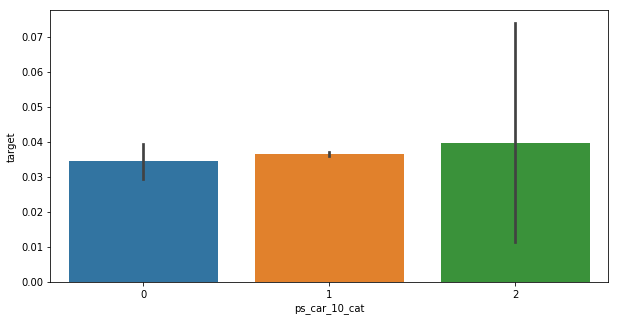

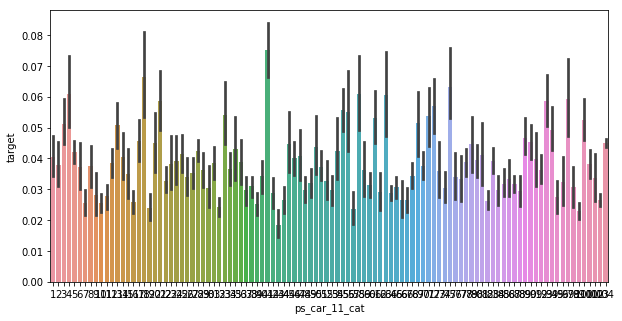

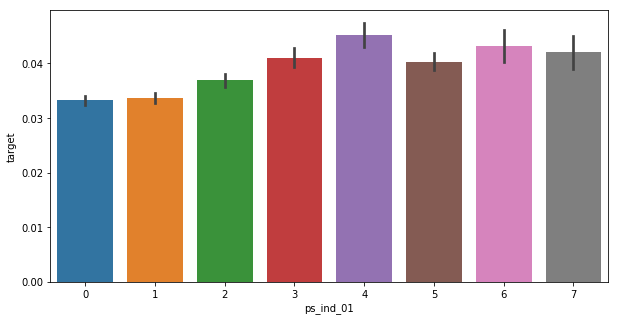

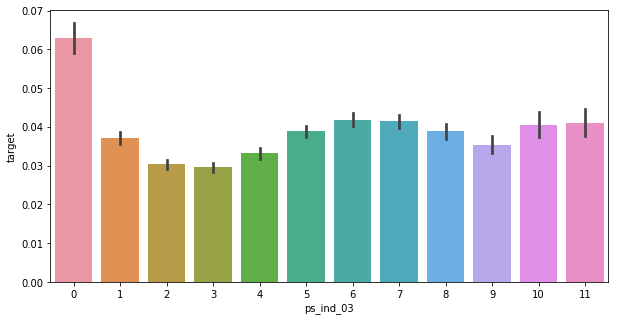

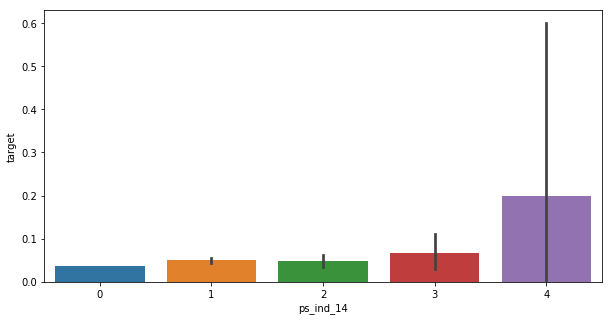

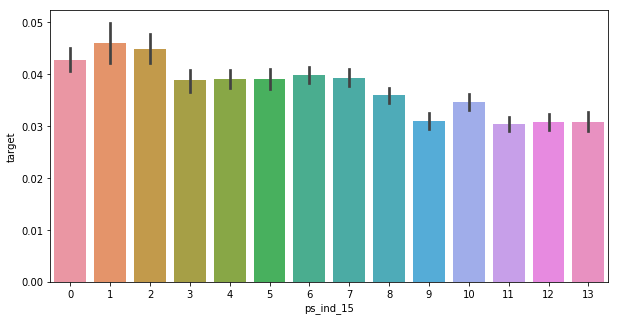

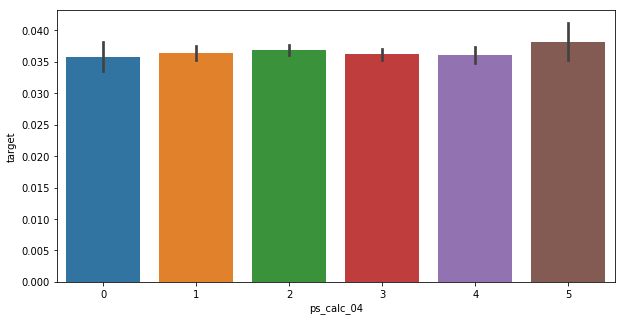

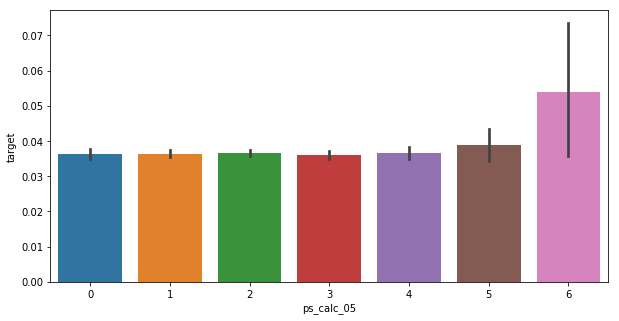

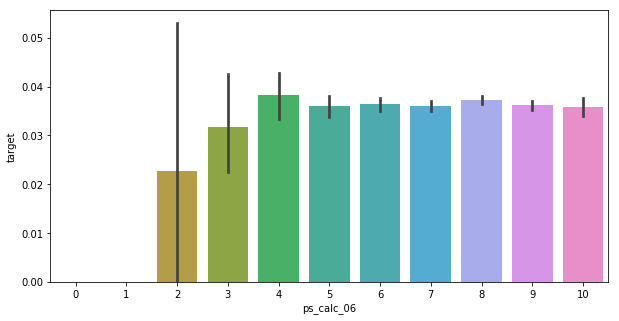

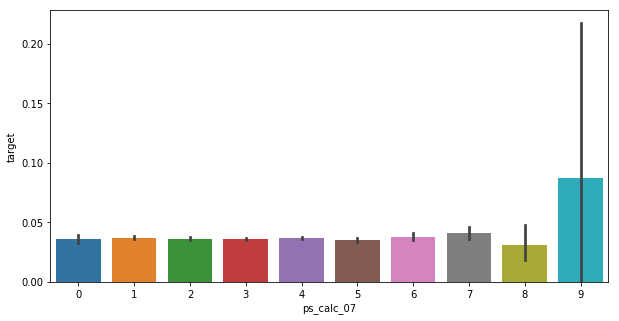

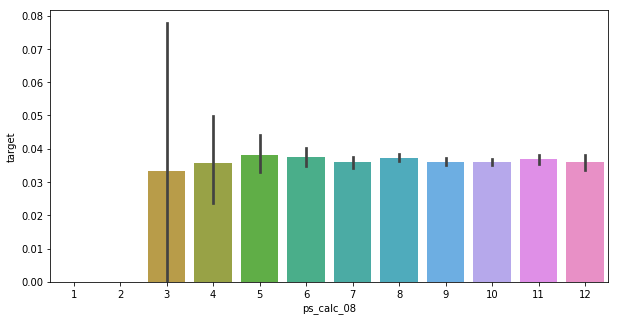

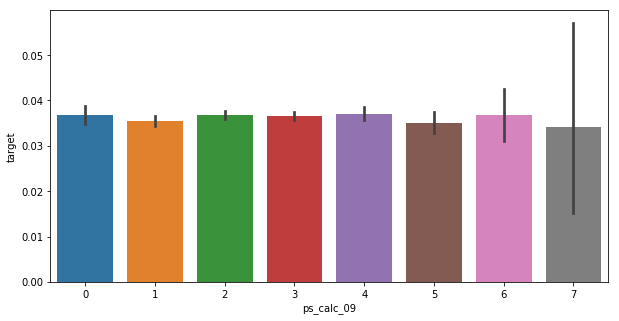

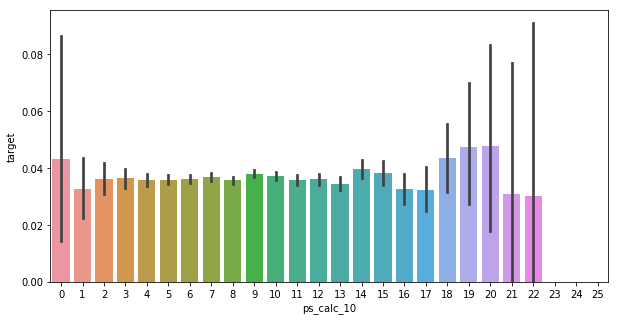

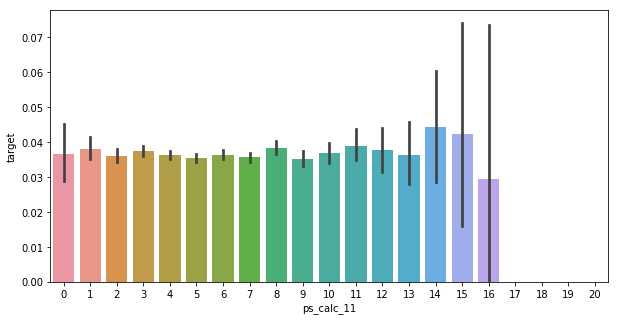

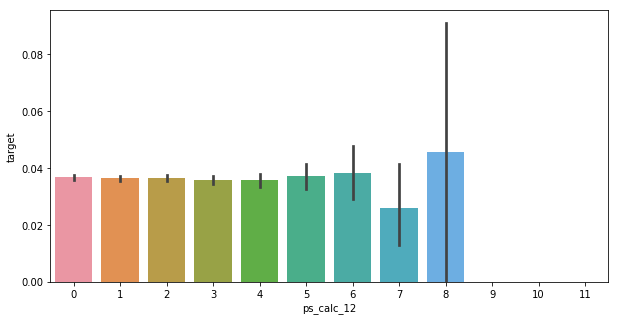

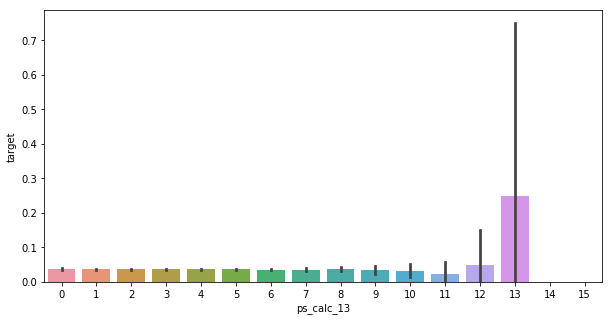

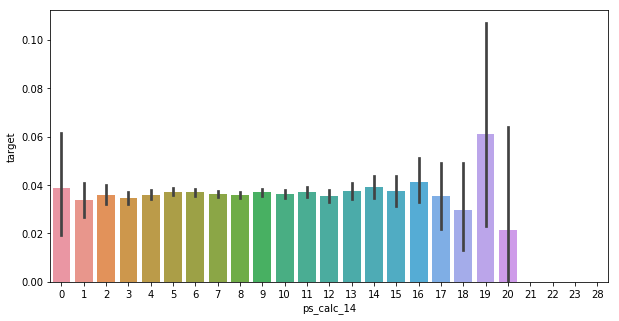

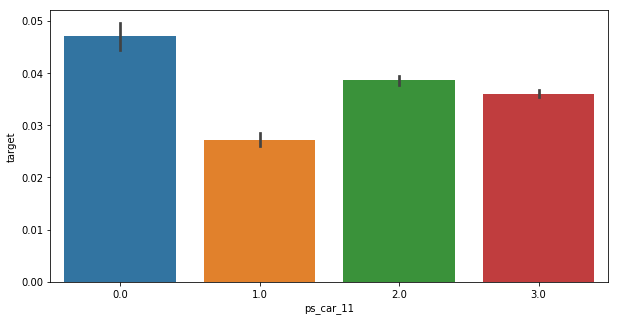

In [15]:
for col in (binary + category + integer):
    bar_plot_ci(col, df)

### 훈련 데이터 vs 테스트 데이터

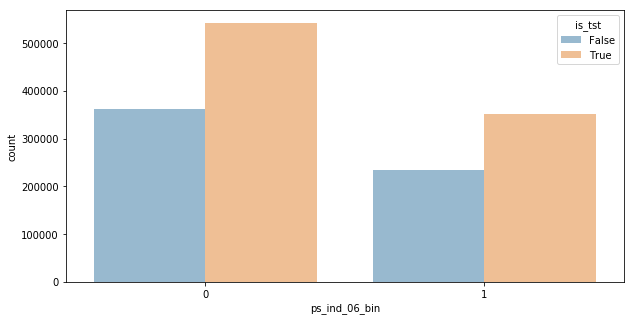

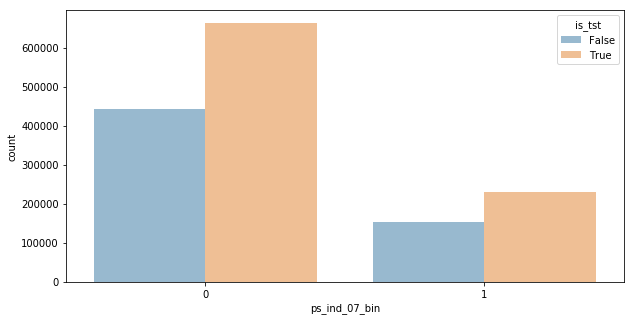

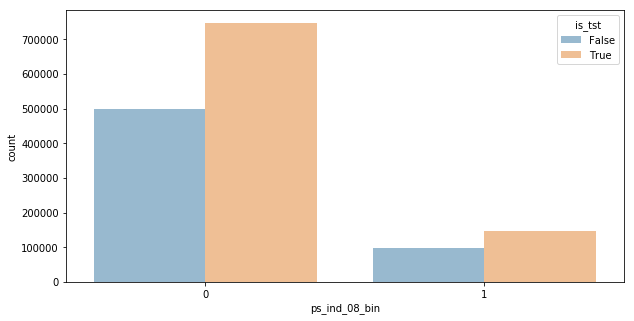

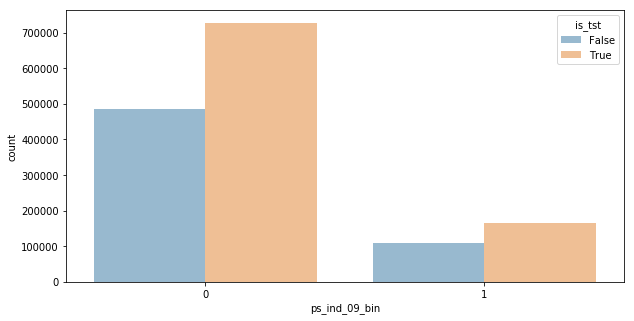

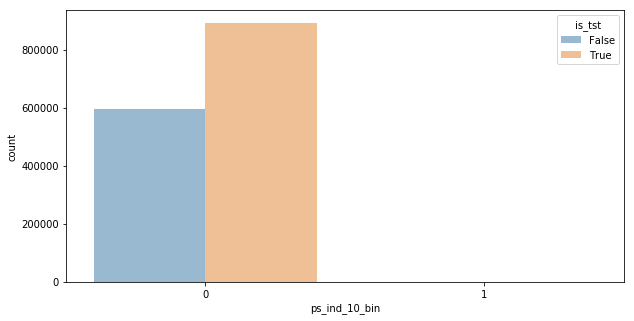

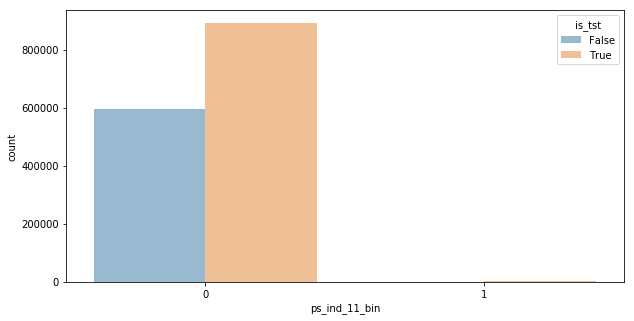

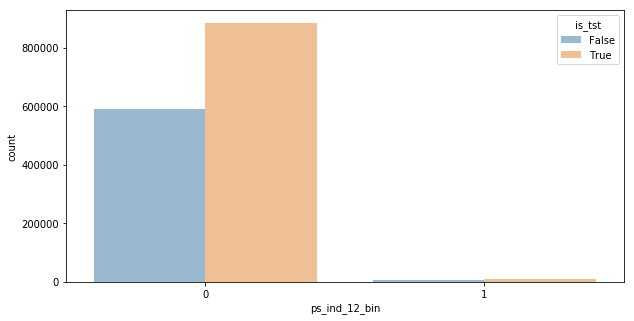

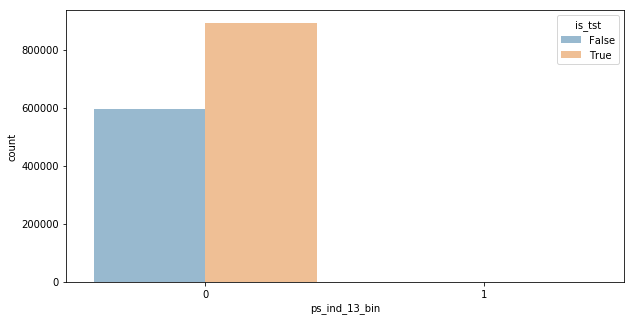

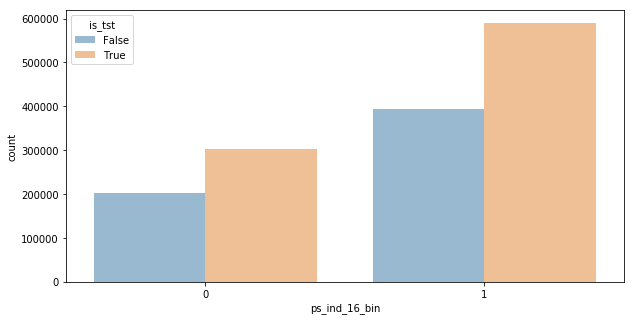

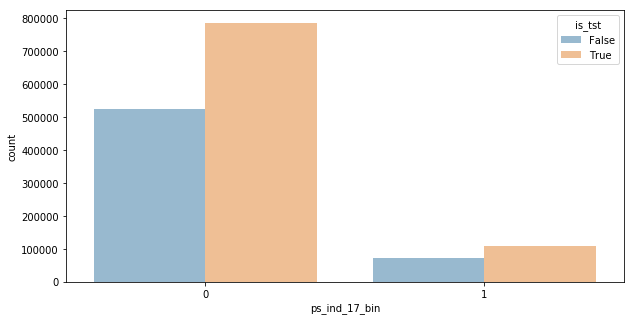

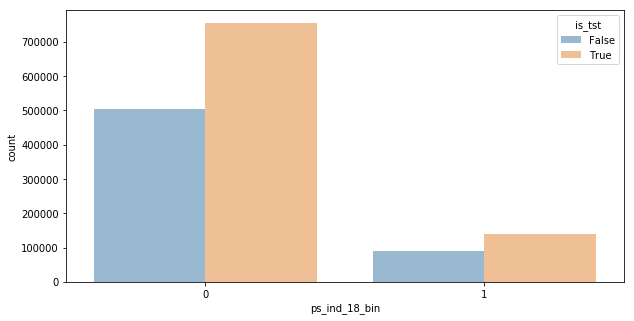

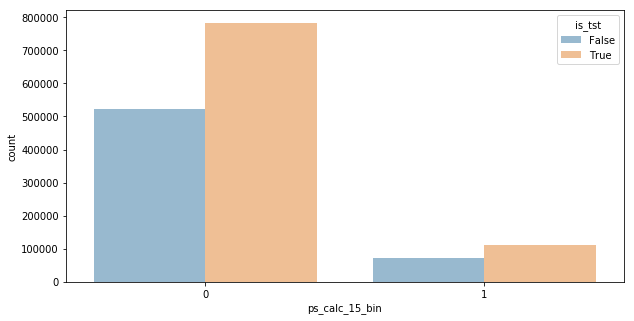

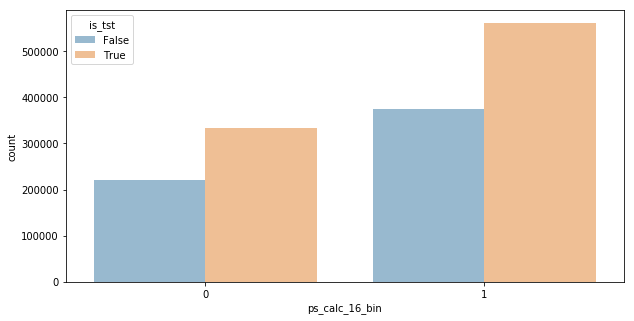

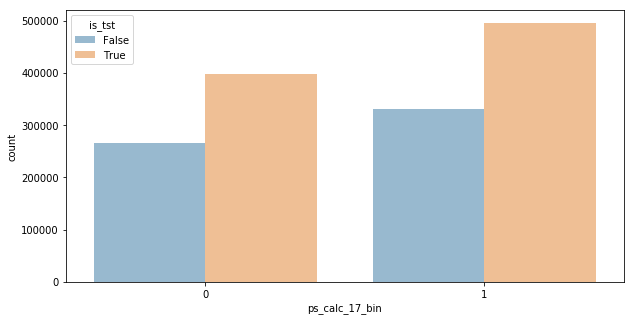

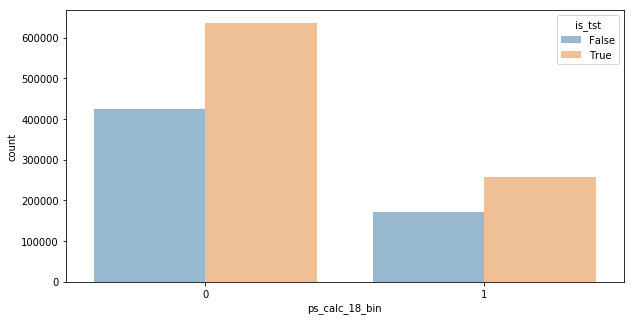

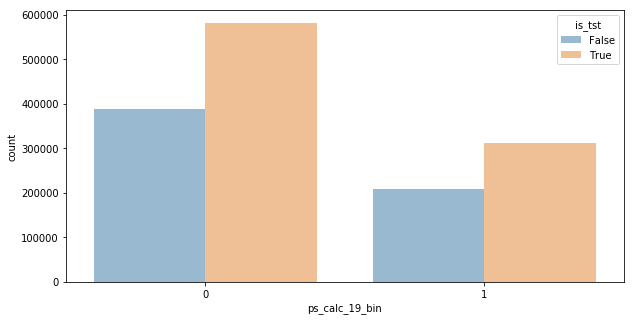

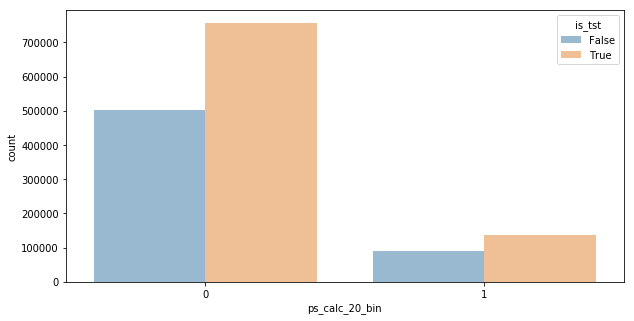

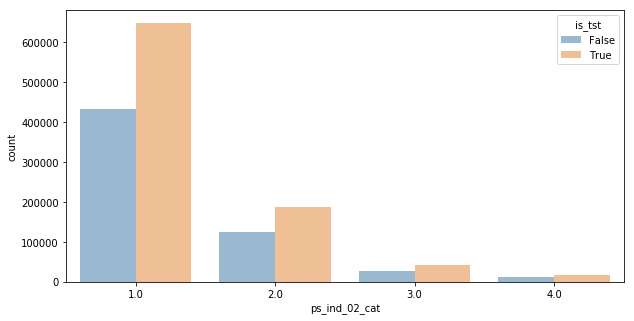

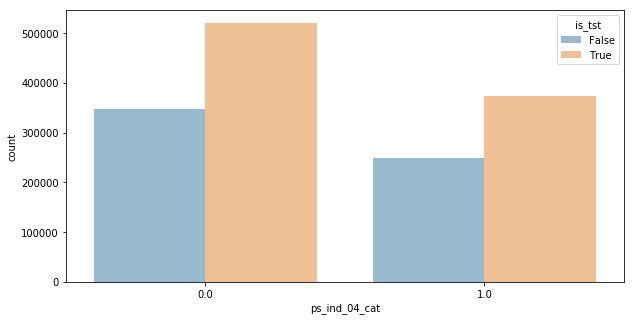

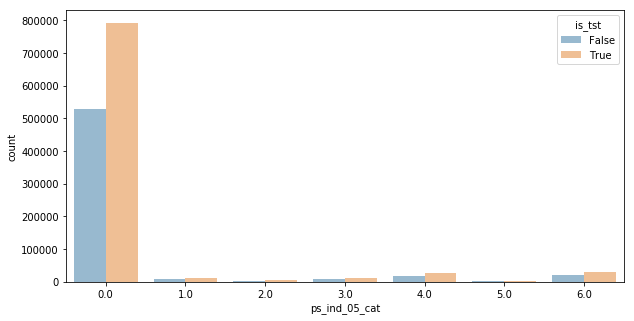

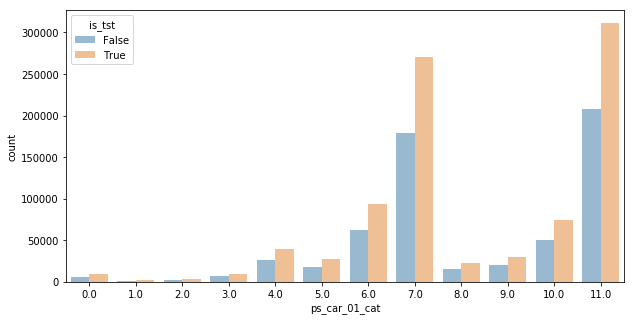

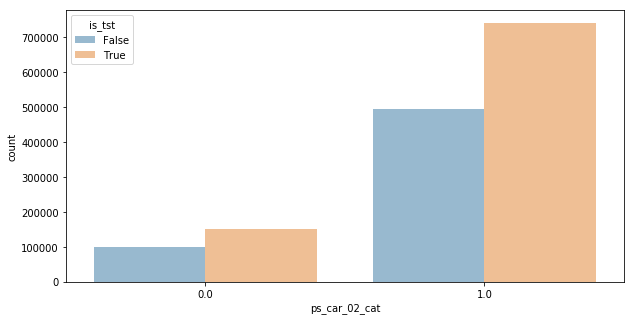

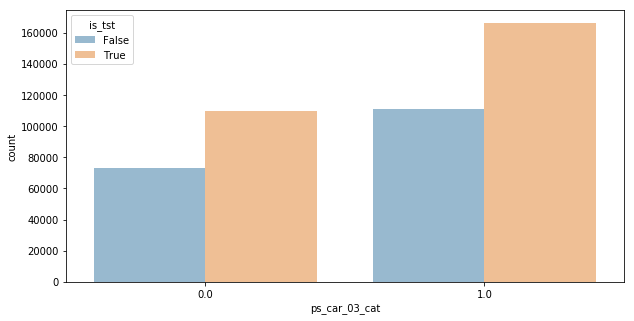

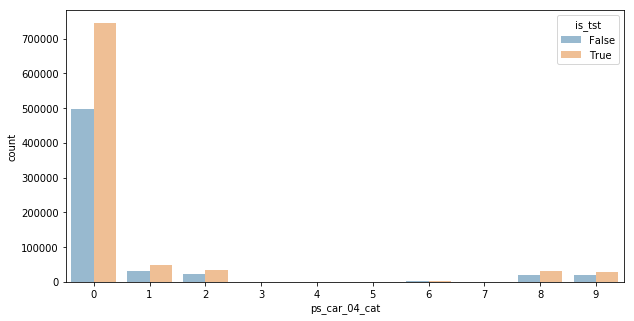

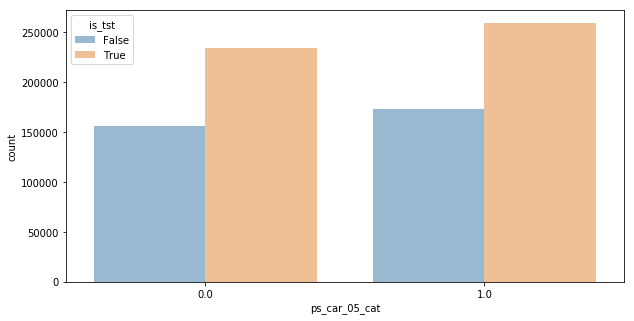

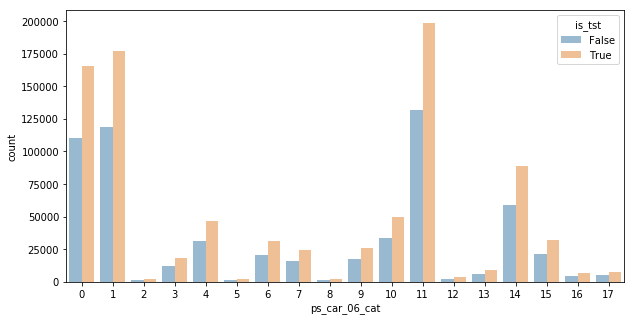

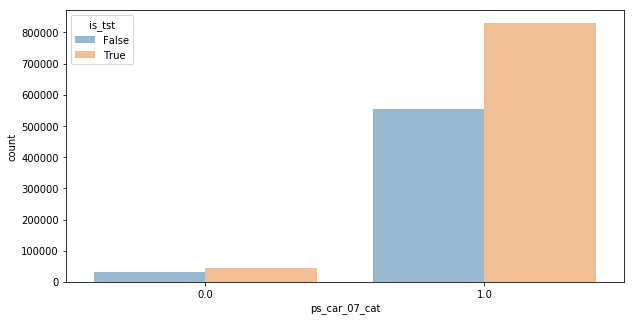

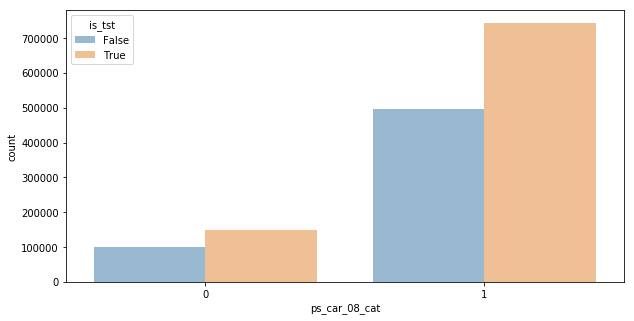

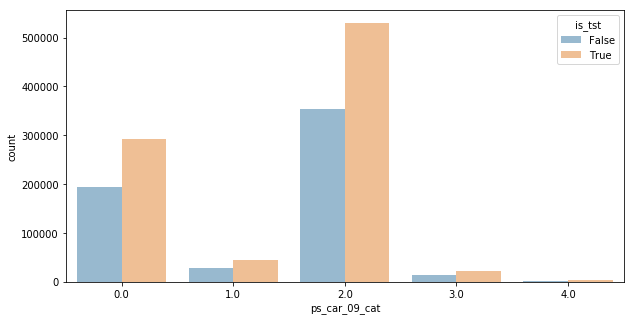

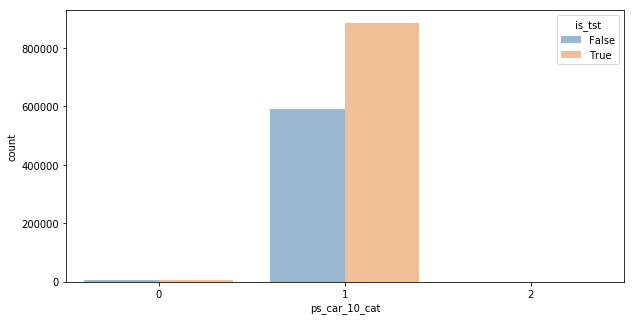

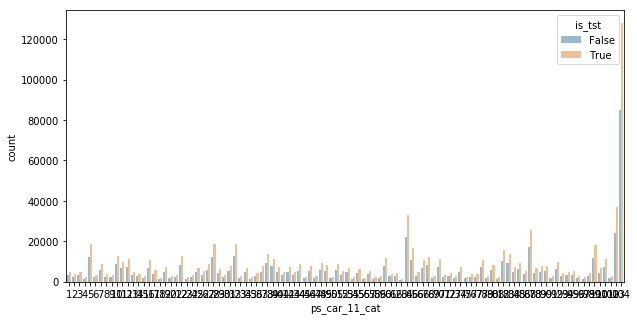

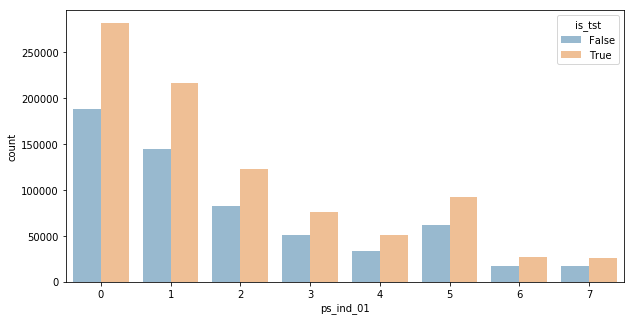

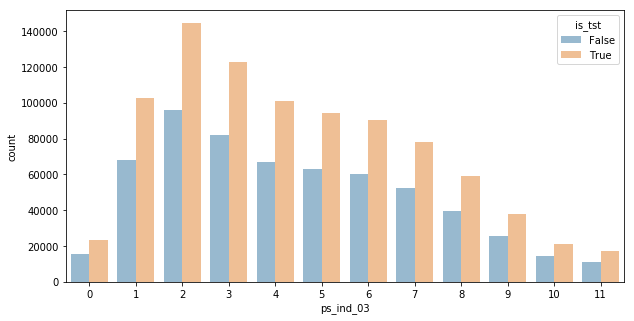

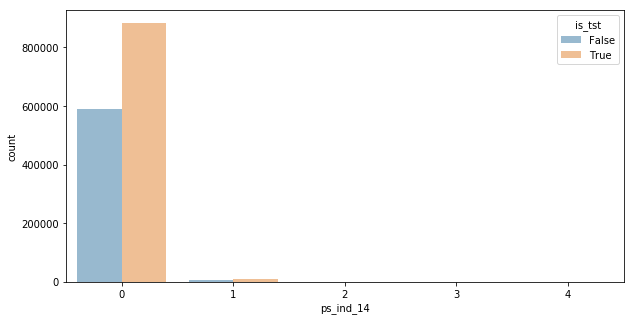

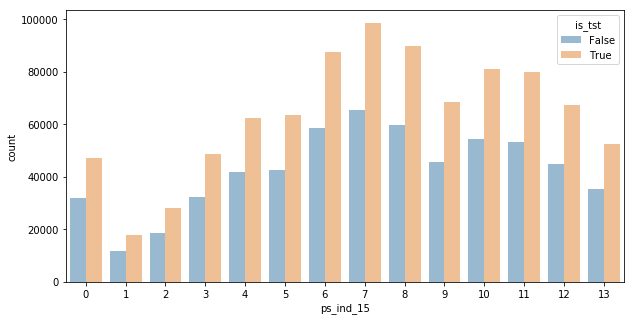

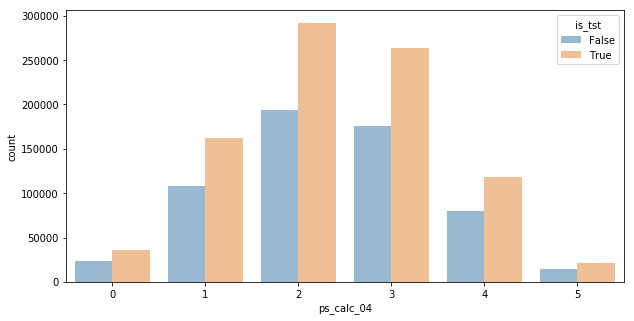

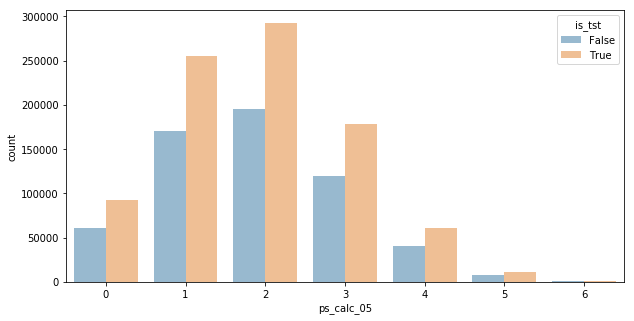

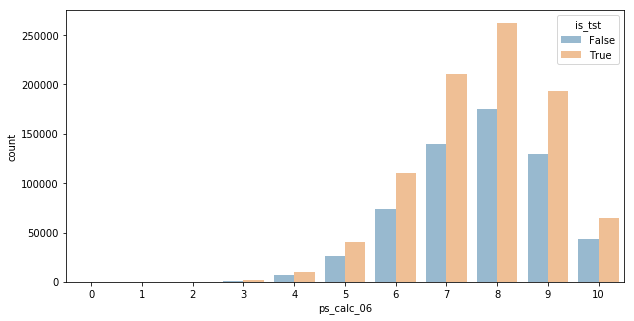

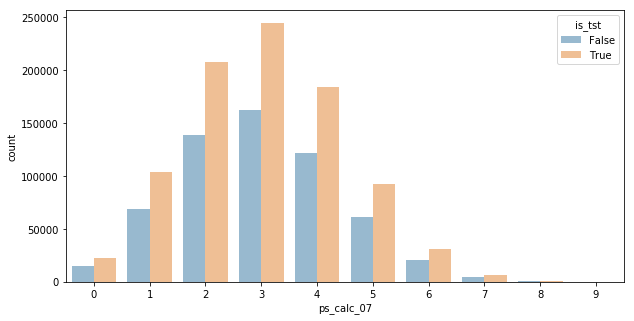

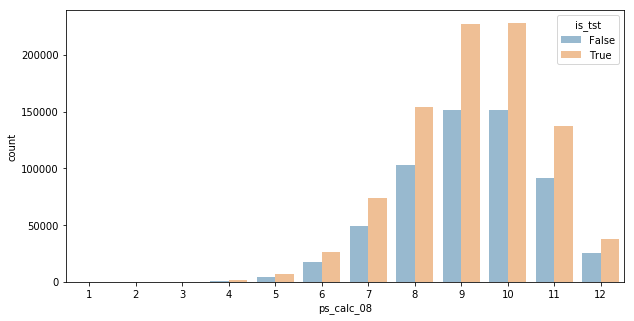

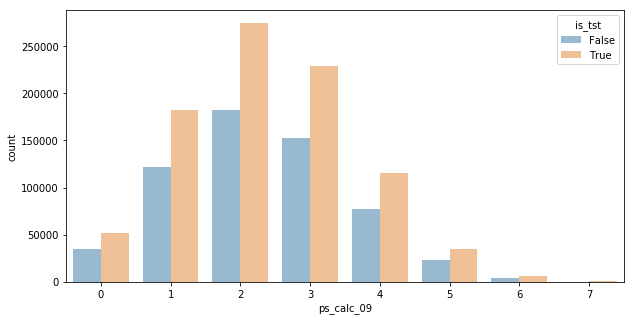

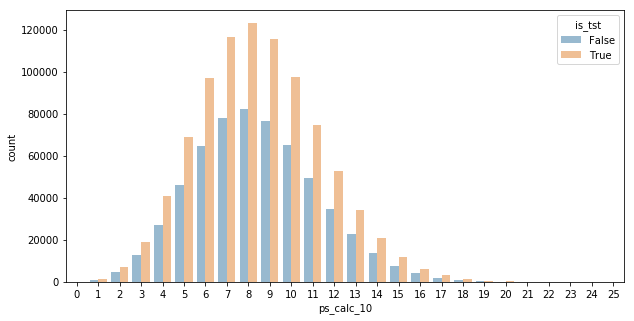

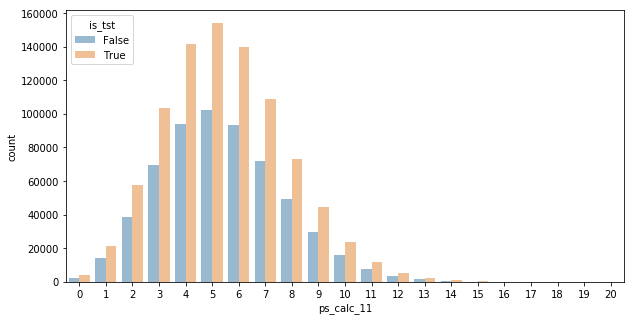

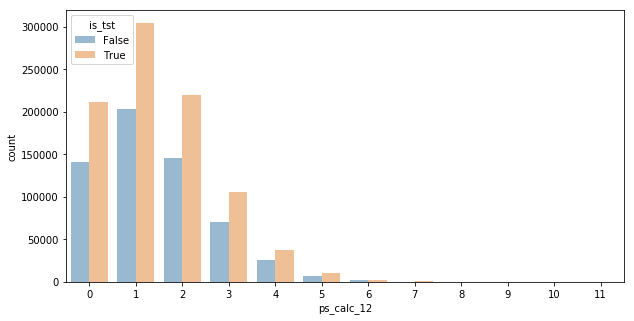

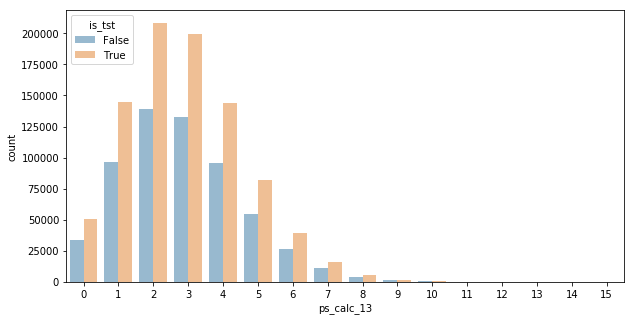

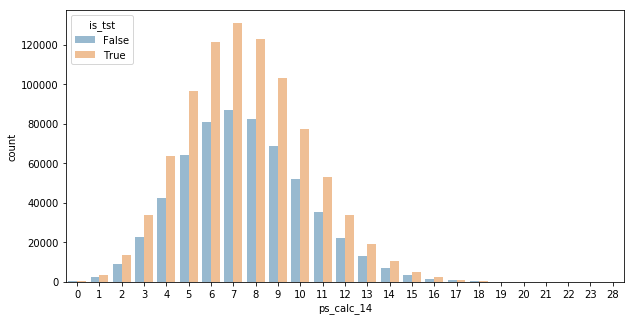

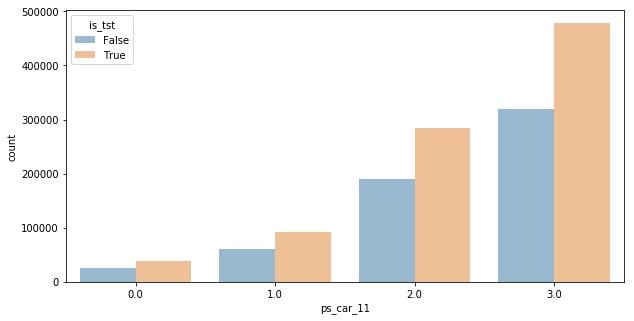

In [19]:
df['is_tst'] = df['target'].isnull()
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')